Dataset page: 
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Preprocessing

In [2]:
from sklearn import datasets
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('loan_train.csv')

In [51]:
df.shape

(614, 13)

In [73]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
df = df.dropna()
df = df.drop('Loan_ID', axis=1)
df.shape

(480, 12)

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [69]:
df['Dependents'] = df.Dependents.apply(lambda x: 3 if x=='3+' else x).astype(int)

for c,v in zip(['Gender', 'Married', 'Education','Self_Employed', 'Property_Area', 'Loan_Status'],
             ['Male',   'Yes',     'Yes',           'Urban',         'Y']): 
    df[c] = df[c].apply(lambda x: 1 if x== v else 0)
df.head()


In [82]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, stratify=df.Loan_Status, test_size=0.2)
X_train, y_train = df_train.iloc[:,1:-1], df_train.iloc[:,-1]
X_test, y_test = df_test.iloc[:,1:-1], df_test.iloc[:,-1]

## Decision Tree

In [93]:
%%time
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


CPU times: user 4.86 ms, sys: 1.42 ms, total: 6.28 ms
Wall time: 5.24 ms


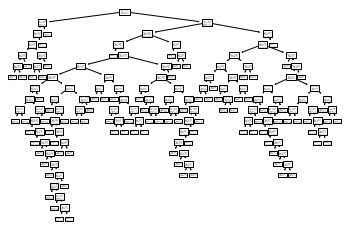

In [85]:
ax = tree.plot_tree(clf);
ax;

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
accuracy_score(y_test, y_hat)

0.7708333333333334

## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy_score(y_test, y_hat)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8125

## SVM

In [91]:
%%time
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1,gamma='auto')

# Somente 2 features para poder plotar boundaries.
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy_score(y_test, y_hat)

CPU times: user 2min 52s, sys: 770 ms, total: 2min 53s
Wall time: 3min 8s


0.8020833333333334

## Naive Bayes

In [92]:
%%time
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy_score(y_hat, y_test)

CPU times: user 4.33 ms, sys: 121 µs, total: 4.45 ms
Wall time: 4.48 ms


0.84375

## KNN

In [83]:
pd.np.empty()

array([[32.10625, 32.10625],
       [32.10625, 32.10625],
       [32.10625, 39.10625]])